In [89]:
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from datetime import date
from fbprophet import Prophet

In [90]:

bitcoin=pd.read_csv('bitcoin_close.csv')

bitcoin.head(30)


,Date,Close Price
0,7/18/10 0:00,0.09
1,7/19/10 0:00,0.08
2,7/20/10 0:00,0.07
3,7/21/10 0:00,0.08
4,7/22/10 0:00,0.05
5,7/23/10 0:00,0.06
6,7/24/10 0:00,0.05
7,7/25/10 0:00,0.05
8,7/26/10 0:00,0.06
9,7/27/10 0:00,0.06


In [91]:
bitcoin.tail(30)

,Date,Close Price
2731,1/8/18 0:00,14970.36
2732,1/9/18 0:00,14439.47
2733,1/10/18 0:00,14890.72
2734,1/11/18 0:00,13287.26
2735,1/12/18 0:00,13812.71
2736,1/13/18 0:00,14188.78
2737,1/14/18 0:00,13619.03
2738,1/15/18 0:00,13585.90
2739,1/16/18 0:00,11348.02
2740,1/17/18 0:00,11141.25


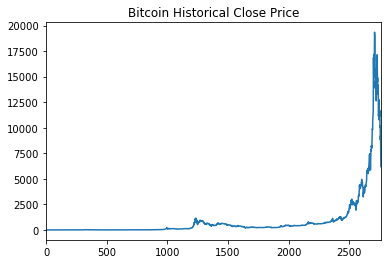

In [92]:
bitcoin['Close Price'].plot(title='Bitcoin Historical Close Price')
plt.show()

In [93]:

bitcoin.rename(columns={'Date':'ds','Close Price':'y'},inplace=True)
bitcoin.tail(60)

,ds,y
2701,12/9/17 0:00,14913.40
2702,12/10/17 0:00,15036.96
2703,12/11/17 0:00,16699.68
2704,12/12/17 0:00,17178.10
2705,12/13/17 0:00,16407.20
2706,12/14/17 0:00,16531.08
2707,12/15/17 0:00,17601.94
2708,12/16/17 0:00,19343.04
2709,12/17/17 0:00,19086.64
2710,12/18/17 0:00,18960.52


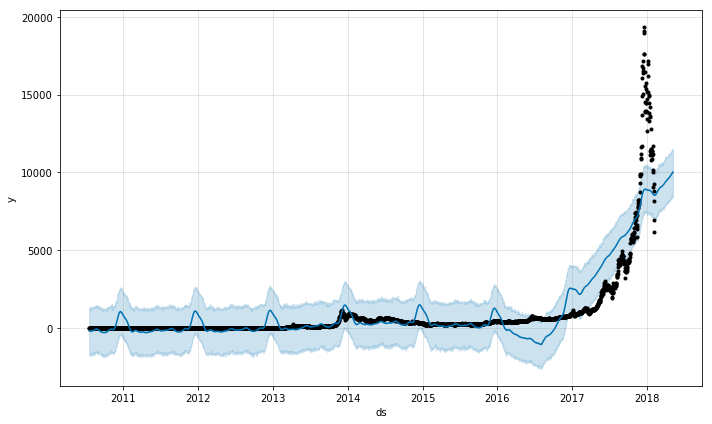

In [94]:
m=Prophet(yearly_seasonality=True)
m.fit(bitcoin)
future=m.make_future_dataframe(periods=90,freq='D')
forecast=m.predict(future)
plt.figure(figsize=(90,30))
fig=m.plot(forecast)
plt.show()

In [95]:
next_90=forecast.iloc[-90:,:][['ds','yhat','yhat_lower','yhat_upper']]
next_90.rename(columns={'ds':'Date','yhat':'bitcoin close Value','yhat_lower':'Lower','yhat_upper':'Upper'},inplace=True)
next_90


,Date,bitcoin close Value,Lower,Upper
2761,2018-02-07 04:20:00,8533.407460,6972.203254,9972.030142
2762,2018-02-08 04:20:00,8533.380638,7076.238943,9890.212991
2763,2018-02-09 04:20:00,8539.536495,7032.556904,10108.535868
2764,2018-02-10 04:20:00,8553.919969,7080.099947,9963.663536
2765,2018-02-11 04:20:00,8557.227612,7009.643855,10095.872499
2766,2018-02-12 04:20:00,8569.244141,7079.657939,10060.276068
2767,2018-02-13 04:20:00,8578.828377,7080.473426,10147.527092
2768,2018-02-14 04:20:00,8607.147279,7031.228165,10091.351968
2769,2018-02-15 04:20:00,8625.752317,7149.512842,10124.489645
2770,2018-02-16 04:20:00,8649.279180,7215.583125,10154.606552
